In [198]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import math
from statsmodels.tsa.stattools import grangercausalitytests

import sys
sys.path.insert(0, os.path.abspath('../Libraries'))
import countries
from countries import get_iso_2_list, get_iso_3_list

In [199]:
tsv_file='../Datasets/tesem220_tabular.tsv'
 
df=pd.read_table(tsv_file,sep='\t')
df

# csv_table.to_csv('GfG.csv',index=False)

,"freq,geo\TIME_PERIOD",2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"A,AT",83.00,82.90,82.40,81.70,79.90,80.40,74.80,74.80,74.60,74.3,73.90,72.00,72.1,71.7,71.2,70.50,70.10
1,"A,BE",85.20,84.90,85.30,85.50,92.10,91.00,90.70,91.90,98.10,97.6,96.90,95.80,95.8,93.8,93.0,92.40,91.60
2,"A,BG",:,:,:,76.70,81.70,80.90,81.60,81.60,81.60,81.6,81.60,81.60,82.0,82.4,82.4,82.40,82.40
3,"A,CH",77.70,77.40,77.60,78.90,78.50,78.50,78.50,78.20,78.50,78.3,78.70,78.30,77.1,77.2,77.6,78.90,80.10
4,"A,CY",62.70,62.50,62.40,:,:,:,:,:,:,64.3,:,:,64.2,64.0,64.4,64.40,64.10
5,"A,CZ",65.70,63.50,59.90,59.60,71.30,71.40,71.70,71.60,71.60,71.7,71.80,72.00,72.3,72.5,72.7,72.80,70.80
6,"A,DE",75.00,75.60,74.80,74.50,75.20,73.50,73.30,73.30,73.00,73.1,73.10,73.20,73.3,73.2,73.2,73.00,72.80
7,"A,DK",91.20,90.60,89.50,88.60,88.80,89.20,88.70,89.40,89.40,89.6,89.60,89.80,89.9,89.3,88.4,87.90,87.20
8,"A,EA19",78.8,78.9,76.9,77.4,77.7,76.8,76.8,76.8,77.1,77.1,77.0,76.8,76.6,76.4,75.8,75.4,75.9
9,"A,EE",64.30,63.50,63.00,62.60,61.90,62.70,63.50,64.30,63.70,63.7,62.90,62.90,62.9,61.5,62.2,62.50,69.30


In [200]:
# Clean the dataset

# Replace ":" with NaN
df_cleaned = df.copy()
for index, row in df_cleaned.iterrows():
    for column in df_cleaned.columns[1:]:
        try:
            row[column] = float(row[column])
        except:
            df_cleaned.at[index, column] = np.NaN


# If there are 3 or less consecutive missing values, use Linear Interpolation to fill the missing values
# If there are more than 3 consecutive missing values, drop the row
df_cleaned.interpolate(method='linear', inplace=True, limit=3)
df_cleaned.dropna(inplace=True)
df_cleaned.reset_index(drop=True, inplace=True)

df_cleaned.rename(columns={'freq,geo\TIME_PERIOD': 'COUNTRY'}, inplace=True)
df_cleaned.rename(columns=lambda x: int(x.strip()) if x != "COUNTRY" else x, inplace=True)
df_cleaned['COUNTRY'] = df_cleaned['COUNTRY'].str.split(',').str[1]

for column in df_cleaned.columns[1:]:
    df_cleaned[column] = df_cleaned[column].astype(float)
df_cleaned

,COUNTRY,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AT,83.0,82.9,82.4,81.7,79.9,80.4,74.8,74.8,74.6,74.3,73.9,72.0,72.1,71.7,71.2,70.5,70.1
1,BE,85.2,84.9,85.3,85.5,92.1,91.0,90.7,91.9,98.1,97.6,96.9,95.8,95.8,93.8,93.0,92.4,91.6
2,CH,77.7,77.4,77.6,78.9,78.5,78.5,78.5,78.2,78.5,78.3,78.7,78.3,77.1,77.2,77.6,78.9,80.1
3,CZ,65.7,63.5,59.9,59.6,71.3,71.4,71.7,71.6,71.6,71.7,71.8,72.0,72.3,72.5,72.7,72.8,70.8
4,DE,75.0,75.6,74.8,74.5,75.2,73.5,73.3,73.3,73.0,73.1,73.1,73.2,73.3,73.2,73.2,73.0,72.8
5,DK,91.2,90.6,89.5,88.6,88.8,89.2,88.7,89.4,89.4,89.6,89.6,89.8,89.9,89.3,88.4,87.9,87.2
6,EA19,78.8,78.9,76.9,77.4,77.7,76.8,76.8,76.8,77.1,77.1,77.0,76.8,76.6,76.4,75.8,75.4,75.9
7,EE,64.3,63.5,63.0,62.6,61.9,62.7,63.5,64.3,63.7,63.7,62.9,62.9,62.9,61.5,62.2,62.5,69.3
8,EL,55.4,56.4,59.1,65.5,65.4,51.5,56.8,50.7,50.6,50.5,50.3,52.5,52.6,52.6,52.3,55.8,53.7
9,ES,80.2,80.3,81.5,81.2,80.6,82.6,82.7,82.8,81.7,81.7,81.2,81.1,81.1,81.9,82.0,80.5,82.1


In [201]:
df_eu = df_cleaned[df_cleaned['COUNTRY'].isin(get_iso_2_list())]
df_eu.reset_index(drop=True, inplace=True)
df_eu.to_csv('../Datasets/cleaned_unemploymentTaxRateDataset.csv', index=False)
df_eu

,COUNTRY,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AT,83.0,82.9,82.4,81.7,79.9,80.4,74.8,74.8,74.6,74.3,73.9,72.0,72.1,71.7,71.2,70.5,70.1
1,BE,85.2,84.9,85.3,85.5,92.1,91.0,90.7,91.9,98.1,97.6,96.9,95.8,95.8,93.8,93.0,92.4,91.6
2,CZ,65.7,63.5,59.9,59.6,71.3,71.4,71.7,71.6,71.6,71.7,71.8,72.0,72.3,72.5,72.7,72.8,70.8
3,DE,75.0,75.6,74.8,74.5,75.2,73.5,73.3,73.3,73.0,73.1,73.1,73.2,73.3,73.2,73.2,73.0,72.8
4,DK,91.2,90.6,89.5,88.6,88.8,89.2,88.7,89.4,89.4,89.6,89.6,89.8,89.9,89.3,88.4,87.9,87.2
5,EE,64.3,63.5,63.0,62.6,61.9,62.7,63.5,64.3,63.7,63.7,62.9,62.9,62.9,61.5,62.2,62.5,69.3
6,ES,80.2,80.3,81.5,81.2,80.6,82.6,82.7,82.8,81.7,81.7,81.2,81.1,81.1,81.9,82.0,80.5,82.1
7,FI,77.8,76.3,74.0,73.1,72.1,72.3,72.3,75.0,75.6,81.7,79.2,78.3,74.4,73.9,73.4,73.1,72.4
8,FR,81.6,80.8,77.4,77.2,77.2,76.9,77.4,77.3,77.3,77.4,76.5,76.5,75.8,75.1,72.6,72.2,72.7
9,HU,62.4,68.4,71.6,71.6,72.2,79.9,79.6,79.5,78.8,78.6,78.4,78.1,78.5,78.5,77.1,76.4,73.3


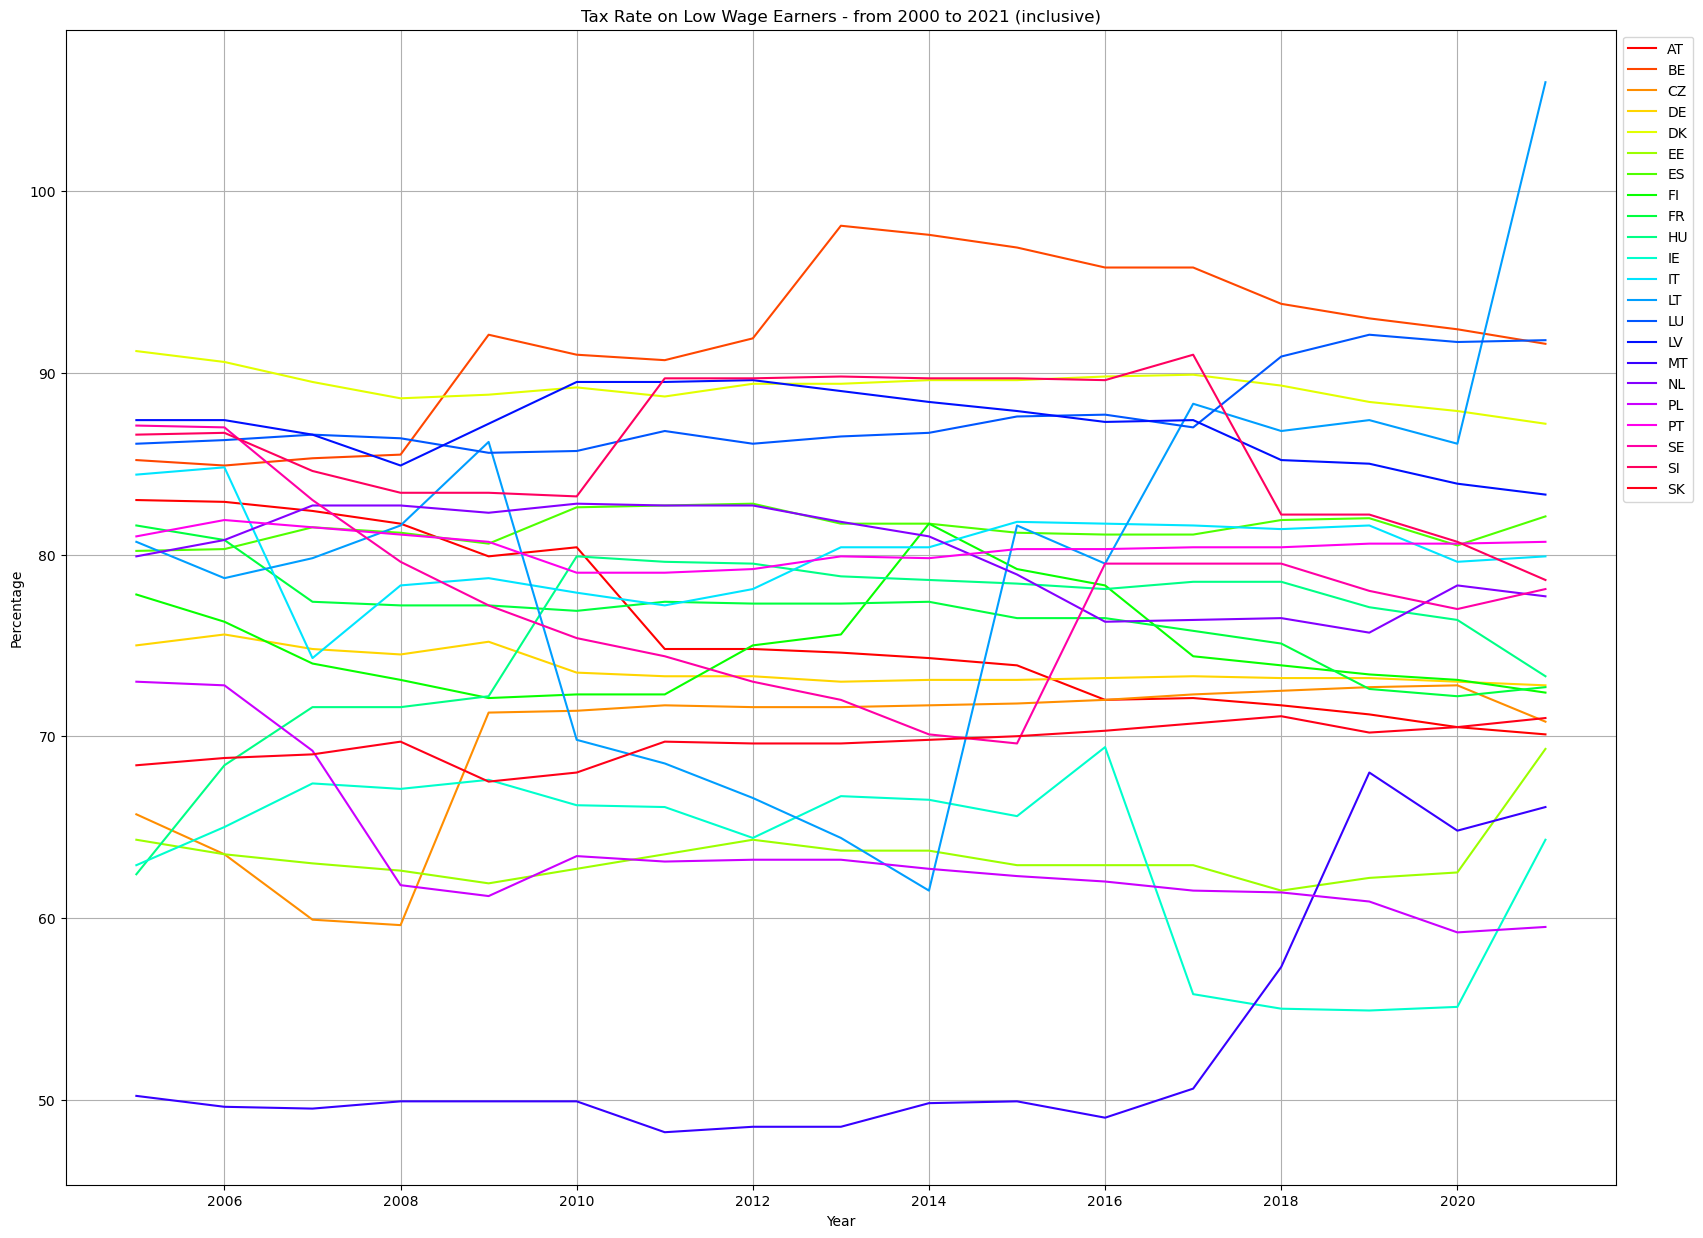

In [202]:
# Plot the tax rate for each country
plt.figure(figsize=(20, 15))

colors = plt.cm.hsv(np.linspace(0, 1, df_eu.shape[0]))
country_codes = df_eu['COUNTRY']
years = df_eu.keys()[1:]

for i in range(len(country_codes)):
    country_code = country_codes[i]
    # Plot years to Value
    plt.plot(years, df_eu.loc[i, years], color=colors[i], label=country_code)

plt.grid()
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='best')
plt.xlabel('Year') 
plt.ylabel('Percentage')
plt.title("Tax Rate on Low Wage Earners - from 2000 to 2021 (inclusive)")
plt.show()

In [203]:
# Get the mean unemployment tax rate
df_eu_mean = df_eu.mean(numeric_only=True, axis=0)
df_eu_mean = df_eu_mean.to_frame().T
df_eu_mean

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,77.004545,77.118182,76.072727,75.55,76.309091,75.940909,75.890909,75.936364,76.163636,76.172727,76.759091,76.922727,76.65,76.322727,76.472727,75.854545,77.240909


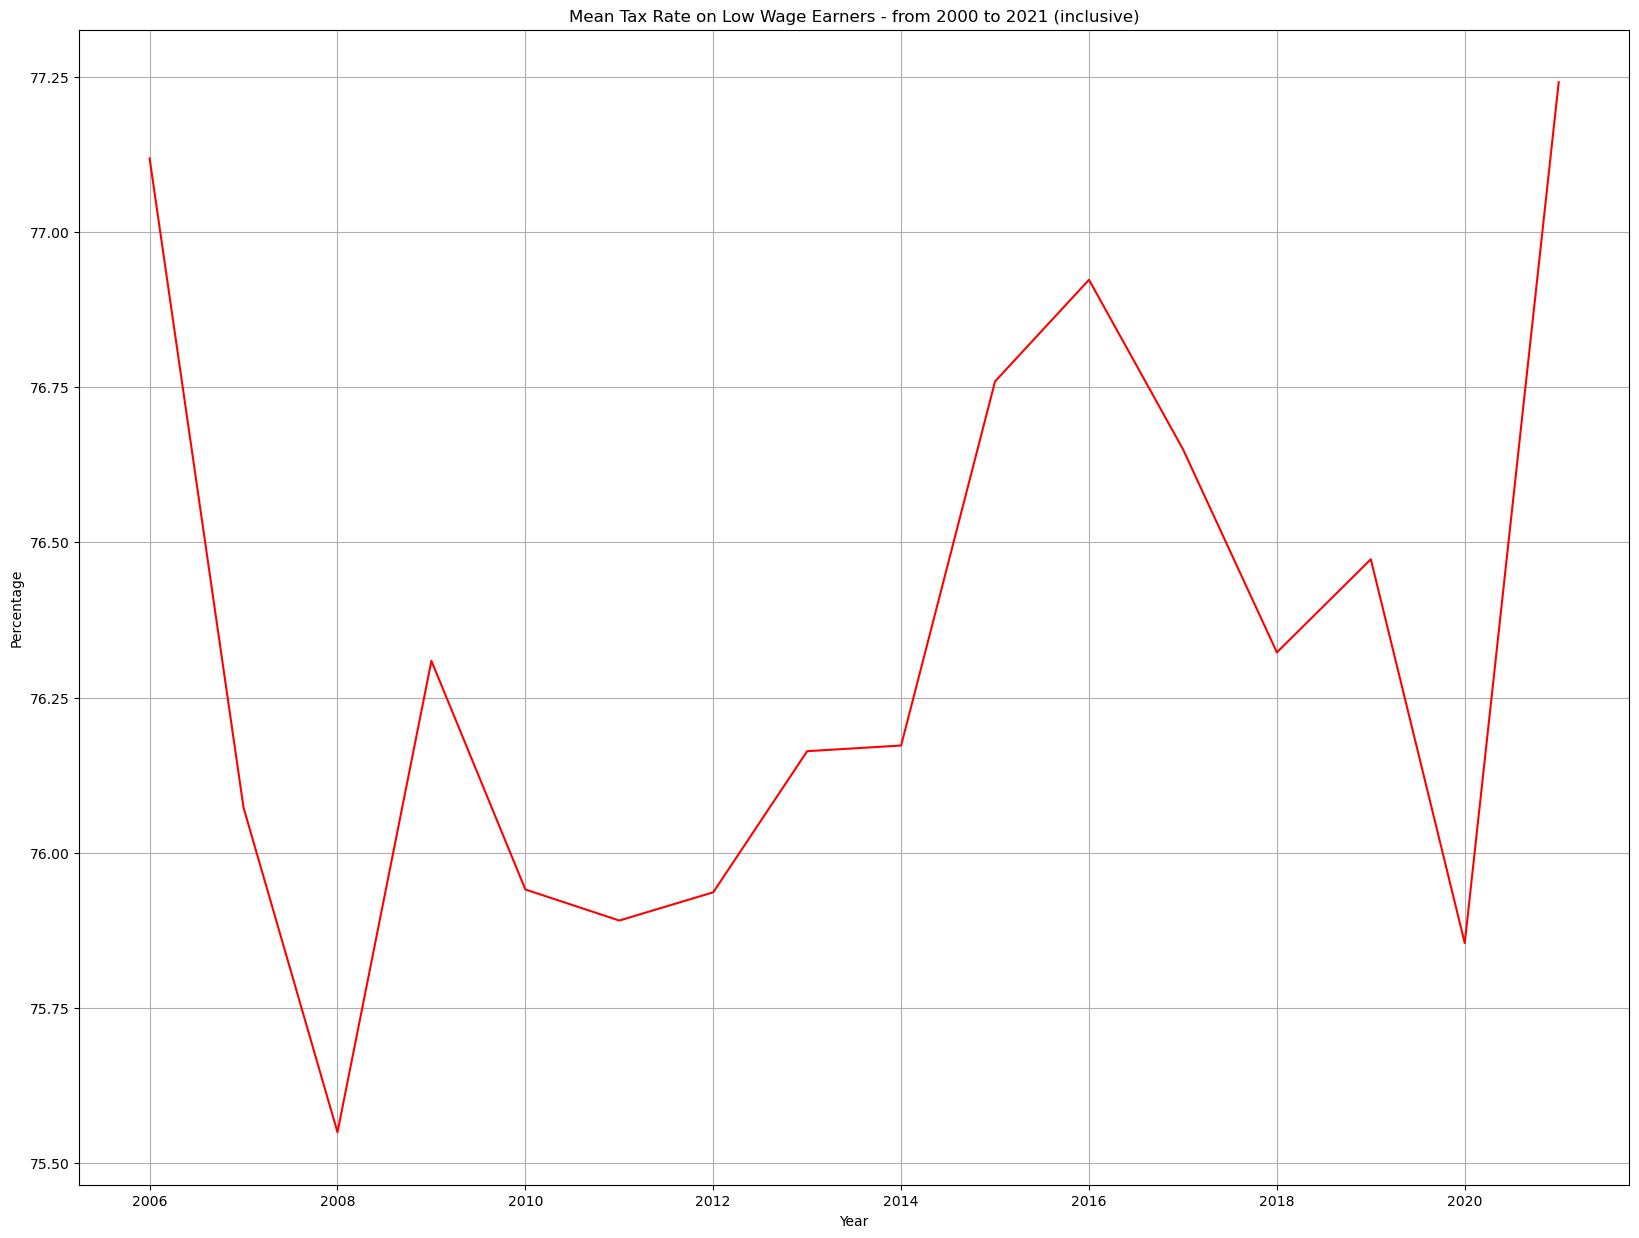

In [204]:
plt.figure(figsize=(20, 15))
plt.plot(df_eu_mean.keys()[1:], df_eu_mean.values[0][1:], color="r")
plt.grid()
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title("Mean Tax Rate on Low Wage Earners - from 2000 to 2021 (inclusive)")
plt.show()

As seen in the graph above, tax rate on unemployment dropped significantly for 2008 and 2020

## Comparison of Tax Rate on Low Wage Earners and Labour Productivity

In [205]:
path = "../Datasets/cleaned_Productivity.csv"
df_labour = pd.read_csv(path)
df_labour.rename(columns=lambda x: int(x) if x.isdigit() else x, inplace=True)
df_labour.drop(columns=['mean'], inplace=True)
df_labour.head()

,LOCATION,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AUS,43.813437,45.338482,46.025462,47.089456,46.931496,47.099677,47.342066,47.873036,49.523676,...,51.671243,52.558753,52.780926,54.099648,53.945416,54.561035,54.559641,55.212012,56.214321,56.820351
1,AUT,55.825179,56.533555,57.591558,58.071618,59.181589,60.632340,62.218785,63.814049,63.814456,...,65.645538,66.080679,66.327394,67.267651,67.184974,67.999464,68.309455,68.309868,69.970148,69.634603
2,BEL,63.089170,63.233672,63.667303,64.204011,66.278551,67.287921,67.637137,68.887444,68.464336,...,68.923207,69.517696,70.513657,71.604653,71.674769,71.534022,71.681631,72.259271,74.541737,73.607184
3,BGR,14.861829,15.438275,16.313284,16.783858,17.182034,17.965425,18.618248,19.229785,19.475667,...,22.497211,22.460713,22.607390,23.296069,23.897609,24.130056,24.784139,25.687153,25.775778,26.559335
4,CAN,44.249048,44.960465,45.686833,45.787448,46.167149,47.187987,47.742663,47.802103,47.658733,...,49.335662,50.068609,51.425818,51.340885,51.524774,52.346352,52.543577,52.996192,56.971404,53.969872


In [206]:
df_labour = df_labour[df_labour['LOCATION'].isin(get_iso_3_list())]
df_labour.reset_index(drop=True, inplace=True)
df_labour.head()

,LOCATION,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AUT,55.825179,56.533555,57.591558,58.071618,59.181589,60.632340,62.218785,63.814049,63.814456,...,65.645538,66.080679,66.327394,67.267651,67.184974,67.999464,68.309455,68.309868,69.970148,69.634603
1,BEL,63.089170,63.233672,63.667303,64.204011,66.278551,67.287921,67.637137,68.887444,68.464336,...,68.923207,69.517696,70.513657,71.604653,71.674769,71.534022,71.681631,72.259271,74.541737,73.607184
2,BGR,14.861829,15.438275,16.313284,16.783858,17.182034,17.965425,18.618248,19.229785,19.475667,...,22.497211,22.460713,22.607390,23.296069,23.897609,24.130056,24.784139,25.687153,25.775778,26.559335
3,CZE,25.998047,27.994158,28.429678,29.901424,31.147574,32.765277,34.781571,36.256014,36.139167,...,36.886973,37.004724,37.432375,39.390083,39.251558,40.595969,41.161265,42.272668,43.289836,43.487932
4,DEU,56.051436,57.459100,57.991792,58.437853,58.970058,59.900695,60.858653,61.577685,61.593702,...,63.093299,63.392823,64.049842,64.376152,65.248665,66.411797,66.549287,67.055996,67.714113,68.303361


In [207]:
# As Labour Productivity dataset uses iso 3, we need to convert the iso 2 to iso 3
df_eu_iso3 = df_eu.copy()
for index, row in df_eu.iterrows():
    df_eu_iso3.at[index, 'COUNTRY'] = countries.convert_iso_2_to_3(row['COUNTRY'])
df_eu_iso3

,COUNTRY,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AUT,83.0,82.9,82.4,81.7,79.9,80.4,74.8,74.8,74.6,74.3,73.9,72.0,72.1,71.7,71.2,70.5,70.1
1,BEL,85.2,84.9,85.3,85.5,92.1,91.0,90.7,91.9,98.1,97.6,96.9,95.8,95.8,93.8,93.0,92.4,91.6
2,CZE,65.7,63.5,59.9,59.6,71.3,71.4,71.7,71.6,71.6,71.7,71.8,72.0,72.3,72.5,72.7,72.8,70.8
3,DEU,75.0,75.6,74.8,74.5,75.2,73.5,73.3,73.3,73.0,73.1,73.1,73.2,73.3,73.2,73.2,73.0,72.8
4,DNK,91.2,90.6,89.5,88.6,88.8,89.2,88.7,89.4,89.4,89.6,89.6,89.8,89.9,89.3,88.4,87.9,87.2
5,EST,64.3,63.5,63.0,62.6,61.9,62.7,63.5,64.3,63.7,63.7,62.9,62.9,62.9,61.5,62.2,62.5,69.3
6,ESP,80.2,80.3,81.5,81.2,80.6,82.6,82.7,82.8,81.7,81.7,81.2,81.1,81.1,81.9,82.0,80.5,82.1
7,FIN,77.8,76.3,74.0,73.1,72.1,72.3,72.3,75.0,75.6,81.7,79.2,78.3,74.4,73.9,73.4,73.1,72.4
8,FRA,81.6,80.8,77.4,77.2,77.2,76.9,77.4,77.3,77.3,77.4,76.5,76.5,75.8,75.1,72.6,72.2,72.7
9,HUN,62.4,68.4,71.6,71.6,72.2,79.9,79.6,79.5,78.8,78.6,78.4,78.1,78.5,78.5,77.1,76.4,73.3


In [208]:
# Get the mean labour productivity
df_labour_mean = df_labour.mean(numeric_only=True, axis=0)
df_labour_mean = df_labour_mean.to_frame().T
df_labour_mean

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,40.966693,41.744138,42.737957,43.705453,44.938228,45.921124,47.12539,48.220077,47.962941,47.372649,...,49.636383,50.024249,50.522629,51.840328,52.072074,53.104936,53.737569,54.456968,55.901828,56.724946


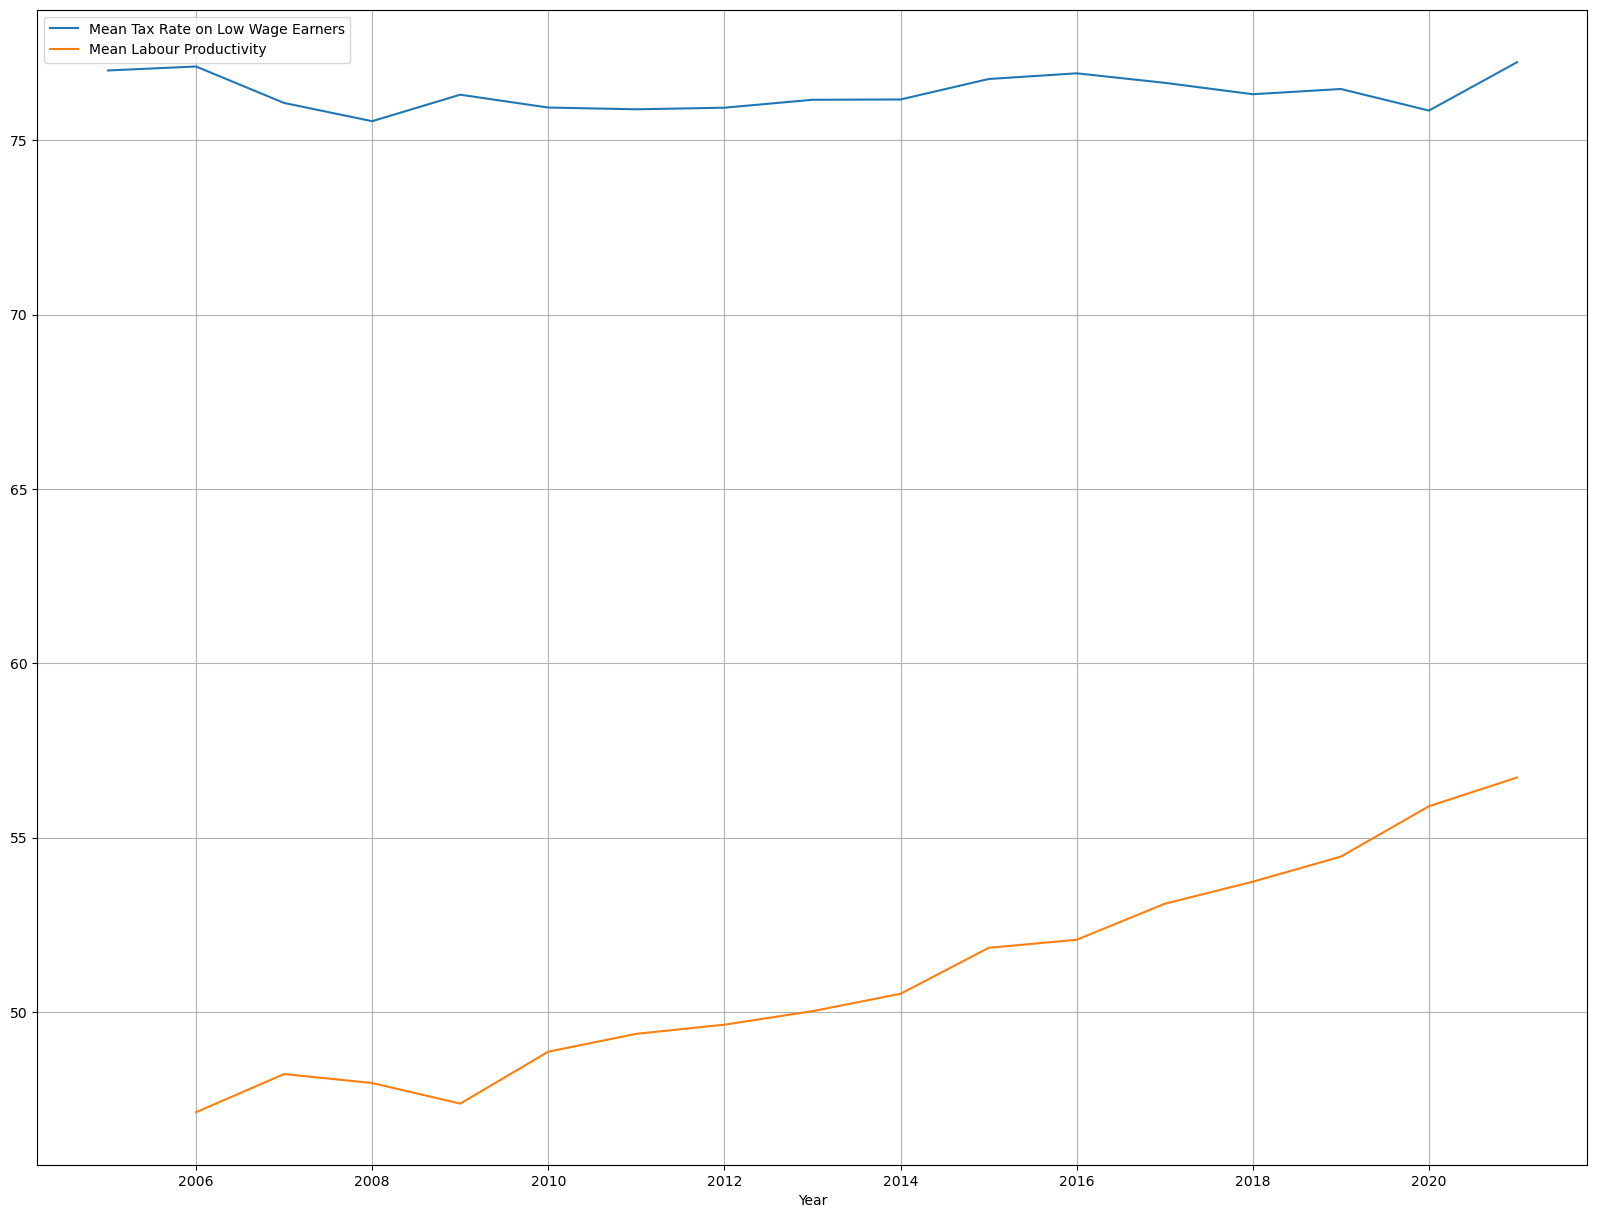

In [226]:
# Plot the mean tax rate and mean labour productivity together
plt.figure(figsize=(20, 15))
plt.plot(years, df_eu_mean.values[0], label="Mean Tax Rate on Low Wage Earners")
plt.plot(df_labour_mean.keys()[6:], df_labour_mean.values[0][6:], label="Mean Labour Productivity")
plt.grid()
plt.legend()
plt.xlabel('Year')
plt.show()

In [ ]:
# Uneven number of country codes, so get the fewest number of country codes
arr1 = [cd for cd in df_eu_iso3['COUNTRY']]
arr2 = [cd for cd in df_labour['LOCATION']]
country_codes = arr1 if len(arr1) < len(arr2) else arr2

In [ ]:
# Join tables together
df_countries = pd.DataFrame(columns=['Year', 'Country', 'Labour Productivity', 'Tax Rate'])
for i in range(len(country_codes)):
    tmp_dict = {}
    countryCode = country_codes[i]
    for year in years:
        tmp_dict[year] = [df_labour.loc[i, year], df_eu_iso3.loc[i, year]]
    df_country = pd.DataFrame.from_dict(tmp_dict, orient='index', columns=['Labour Productivity', 'Tax Rate'])
    df_country['Year'] = df_country.index
    df_country['Country'] = countryCode

    df_countries = pd.concat([df_countries, df_country], axis=0)
df_countries.reset_index(drop=True, inplace=True)

In [ ]:
# Look at correlation between labour productivity and tax rate on low wage earners
df_countries.groupby(df_countries['Country']).corr(numeric_only=True)

Labour Productivity  Tax Rate
Country                                                   
AUT     Labour Productivity             1.000000 -0.944059
        Tax Rate                       -0.944059  1.000000
BEL     Labour Productivity             1.000000  0.538396
        Tax Rate                        0.538396  1.000000
CZE     Labour Productivity             1.000000  0.713988
        Tax Rate                        0.713988  1.000000
DEU     Labour Productivity             1.000000 -0.727300
        Tax Rate                       -0.727300  1.000000
DNK     Labour Productivity             1.000000 -0.540718
        Tax Rate                       -0.540718  1.000000
ESP     Labour Productivity             1.000000  0.337947
        Tax Rate                        0.337947  1.000000
EST     Labour Productivity             1.000000  0.221418
        Tax Rate                        0.221418  1.000000
FIN     Labour Productivity             1.000000 -0.214204
        Tax Rate                       -0.214204  1.000000
FRA     Labour Productivity             1.000000 -0.796902
        Tax Rate                       -0.796902  1.000000
HUN     Labour Productivity             1.000000  0.468815
        Tax Rate                        0.468815  1.000000
IRL     Labour Productivity             1.000000 -0.697088
        Tax Rate                       -0.697088  1.000000
ITA     Labour Productivity             1.000000 -0.286906
        Tax Rate                       -0.286906  1.000000
LTU     Labour Productivity             1.000000  0.495019
        Tax Rate                        0.495019  1.000000
LUX     Labour Productivity             1.000000  0.900449
        Tax Rate                        0.900449  1.000000
LVA     Labour Productivity             1.000000 -0.606249
        Tax Rate                       -0.606249  1.000000
MLT     Labour Productivity             1.000000  0.746824
        Tax Rate                        0.746824  1.000000
NLD     Labour Productivity             1.000000 -0.646100
        Tax Rate                       -0.646100  1.000000
POL     Labour Productivity             1.000000  0.487741
        Tax Rate                        0.487741  1.000000
PRT     Labour Productivity             1.000000 -0.143427
        Tax Rate                       -0.143427  1.000000
SVK     Labour Productivity             1.000000  0.783433
        Tax Rate                        0.783433  1.000000
SVN     Labour Productivity             1.000000 -0.305773
        Tax Rate                       -0.305773  1.000000
SWE     Labour Productivity             1.000000 -0.459595
        Tax Rate                       -0.459595  1.000000

In [229]:
# Look at correlation between mean labour productivity and mean tax rate on low wage earners
df_labour_mean.corrwith(df_eu_mean, axis=1)

0    0.165626
dtype: float64

In [225]:
# Use Granger Causality tests to compare the means
df_mean = pd.DataFrame(columns=['labour_productivity', 'tax_rate'])
df_mean['labour_productivity'] = df_labour_mean.values[0][6:]
df_mean['tax_rate'] = df_eu_mean.values[0][1:]
results = grangercausalitytests(df_mean, maxlag=2, verbose=False)

# If the p-value is less than 0.05, then the null hypothesis is rejected and there is a Granger Causality
if results.get(1)[0]['ssr_ftest'][1] < 0.05:
    print('Tax Rate is a predictor variable of Labour Productivity')

results = grangercausalitytests(df_mean[['tax_rate', 'labour_productivity']], maxlag=2, verbose=False)

# If the p-value is less than 0.05, then the null hypothesis is rejected and there is a Granger Causality
if results.get(1)[0]['ssr_ftest'][1] < 0.05:
    print('Labour Productivity is a predictor variable of Tax Rate')

Labour Productivity is a predictor variable of Tax Rate
